In [1]:
from fbprophet import Prophet
import pandas as pd
import numpy as np
import datetime as dt
import tensorflow as tf

In [2]:
store_13 = pd.read_csv("frequent.csv", index_col=0)

In [3]:
store_13.head()

ENTREGA  GE2 CELULAR  GE1 ELETROPORTATEIS  GE1 CELULAR  \
2015-01-02     22.0         11.0                 11.0         22.0   
2015-01-03     31.0         12.0                 24.0         26.0   
2015-01-05     41.0          8.0                 26.0         28.0   
2015-01-06     44.0         10.0                 22.0         23.0   
2015-01-07     55.0          9.0                 21.0         38.0   

            CHIP VIVO 4G 128K P19 HRS PRE  GE1 TV LCD LED  \
2015-01-02                           17.0             4.0   
2015-01-03                           20.0             4.0   
2015-01-05                           19.0             4.0   
2015-01-06                           20.0             4.0   
2015-01-07                           22.0             5.0   

            CHIP CLARO ODA 128KB TRIPE  GE1 MOVEIS 1  GE2 REFRIGERADOR  \
2015-01-02                         0.0           2.0               3.0   
2015-01-03                         0.0           4.0               2.0   
2015-01-05                         0.0           8.0              20.0   
2015-01-06                         0.0           4.0               7.0   
2015-01-07                         0.0           7.0               8.0   

            CHIP TIM INFINITY PRE HRD TRIPLO 4G  ...  CHIP OI 4G HLR 39  \
2015-01-02                                  0.0  ...                0.0   
2015-01-03                                  0.0  ...                0.0   
2015-01-05                                  0.0  ...                0.0   
2015-01-06                                  0.0  ...                0.0   
2015-01-07                                  0.0  ...                0.0   

            GE2 LAV. ROUPAS AUTOMATICA  \
2015-01-02                         0.0   
2015-01-03                         0.0   
2015-01-05                         2.0   
2015-01-06                         2.0   
2015-01-07                         2.0   

            SUPORTE TV UNIVERSAL LCD/LED 10 A 71 SBRUB750  \
2015-01-02                                            0.0   
2015-01-03                                            0.0   
2015-01-05                                            0.0   
2015-01-06                                            0.0   
2015-01-07                                            0.0   

            VENTILADOR 40CM V-49 6P RED PREMIUM  \
2015-01-02                                  0.0   
2015-01-03                                  0.0   
2015-01-05                                  0.0   
2015-01-06                                  0.0   
2015-01-07                                  0.0   

            TABLET NB184 M7S QUAD CORE PRETO  GE1 FOGAO 2 A 6 BOCAS  \
2015-01-02                               0.0                    0.0   
2015-01-03                               0.0                    0.0   
2015-01-05                               0.0                    1.0   
2015-01-06                               0.0                    3.0   
2015-01-07                               0.0                    1.0   

            FOGAO 4BC. BALI 4076 BR  VENTILADOR 30CM NV-15 6P BR 220V  \
2015-01-02                      0.0                               0.0   
2015-01-03                      0.0                               0.0   
2015-01-05                      0.0                               0.0   
2015-01-06                      0.0                               0.0   
2015-01-07                      0.0                               0.0   

            CELULAR RIU-I R200 DB PRETO-VERMELHO  \
2015-01-02                                   0.0   
2015-01-03                                   0.0   
2015-01-05                                   0.0   
2015-01-06                                   0.0   
2015-01-07                                   0.0   

            CELULAR RIU-I R200 DB PRETO-AMARELO  
2015-01-02                                  0.0  
2015-01-03                                  0.0  
2015-01-05                                  0.0  
2015-01-06            

In [4]:
import matplotlib.pyplot as plt

## Ventilador

In [5]:
store_13

ENTREGA  GE2 CELULAR  GE1 ELETROPORTATEIS  GE1 CELULAR  \
2015-01-02     22.0         11.0                 11.0         22.0   
2015-01-03     31.0         12.0                 24.0         26.0   
2015-01-05     41.0          8.0                 26.0         28.0   
2015-01-06     44.0         10.0                 22.0         23.0   
2015-01-07     55.0          9.0                 21.0         38.0   
...             ...          ...                  ...          ...   
2019-06-19      0.0          0.0                  0.0          0.0   
2019-06-20      0.0          0.0                  0.0          0.0   
2019-06-21      0.0          0.0                  0.0          0.0   
2019-06-22      0.0          0.0                  0.0          0.0   
2019-06-25      0.0          0.0                  0.0          0.0   

            CHIP VIVO 4G 128K P19 HRS PRE  GE1 TV LCD LED  \
2015-01-02                           17.0             4.0   
2015-01-03                           20.0             4.0   
2015-01-05                           19.0             4.0   
2015-01-06                           20.0             4.0   
2015-01-07                           22.0             5.0   
...                                   ...             ...   
2019-06-19                            1.0             0.0   
2019-06-20                            3.0             0.0   
2019-06-21                            3.0             0.0   
2019-06-22                            2.0             0.0   
2019-06-25                            2.0             0.0   

            CHIP CLARO ODA 128KB TRIPE  GE1 MOVEIS 1  GE2 REFRIGERADOR  \
2015-01-02                         0.0           2.0               3.0   
2015-01-03                         0.0           4.0               2.0   
2015-01-05                         0.0           8.0              20.0   
2015-01-06                         0.0           4.0               7.0   
2015-01-07                         0.0           7.0               8.0   
...                                ...           ...               ...   
2019-06-19                         4.0           0.0               0.0   
2019-06-20                         2.0           0.0               0.0   
2019-06-21                         3.0           0.0               0.0   
2019-06-22                         1.0           0.0               0.0   
2019-06-25                         3.0           0.0               0.0   

            CHIP TIM INFINITY PRE HRD TRIPLO 4G  ...  CHIP OI 4G HLR 39  \
2015-01-02                                  0.0  ...                0.0   
2015-01-03                                  0.0  ...                0.0   
2015-01-05                                  0.0  ...                0.0   
2015-01-06                                  0.0  ...                0.0   
2015-01-07                                  0.0  ...                0.0   
...                                         ...  ...                ...   
2019-06-19                                 11.0  ...               24.0   
2019-06-20                                  6.0  ...               23.0   
2019-06-21                                 11.0  ...               22.0   
2019-06-22                                  2.0  ...               18.0   
2019-06-25                                  5.0  ...               17.0   

            GE2 LAV. ROUPAS AUTOMATICA  \
2015-01-02                         0.0   
2015-01-03                         0.0   
2015-01-05                         2.0   
2015-01-06                         2.0   
2015-01-07                         2.0   
...                                ...   
2019-06-19                         0.0   
2019-06-20                         0.0   
2019-06-21                         0.0   
2019-06-22                         0.0   
2019-06-25                         0.0   

            SUPORTE TV UNIVERSAL LCD/LED 10 A 71 SBRUB750  \
2015-01-02                                            0.0   
2015-01-03           

In [6]:
ventilador = store_13["VENTILADOR VF40 SILENCE FORCE CD RE"]
ventilador.index = pd.to_datetime(ventilador.index)
ventest = ventilador.loc[ventilador.index.year == 2019]
ventilador = ventilador.loc[ventilador.index.year != 2019]

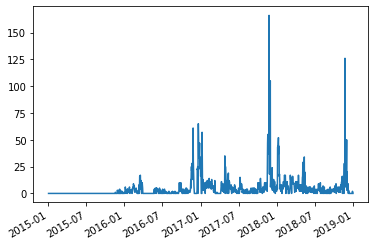

In [7]:
ventilador.plot();

In [8]:
ventilog = np.log(ventilador)

/home/itamar/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning:

divide by zero encountered in log



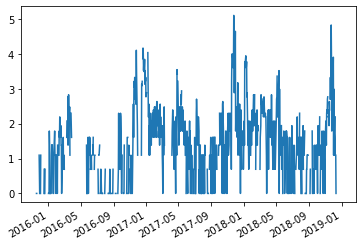

In [9]:
ventilog.plot();

In [10]:
ventilog = ventilog.reset_index()

In [11]:
ventilog.columns = ["ds","y"]
ventilog = ventilog.replace(-np.inf,0)

In [12]:
m = Prophet()
m.fit(ventilog)

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [13]:
future = m.make_future_dataframe(periods=176) #same number of days that we have in 2019

In [14]:
future.tail()

ds
1421 2019-06-21
1422 2019-06-22
1423 2019-06-23
1424 2019-06-24
1425 2019-06-25

In [15]:
forecast = m.predict(future)

In [16]:
forecast[["ds", "yhat","yhat_lower", "yhat_upper"]].tail()

ds      yhat  yhat_lower  yhat_upper
1421 2019-06-21  0.562921   -0.494696    1.555084
1422 2019-06-22  0.633164   -0.345923    1.692043
1423 2019-06-23 -0.342090   -1.380526    0.646170
1424 2019-06-24  0.509924   -0.476458    1.562119
1425 2019-06-25  0.433290   -0.589883    1.494715

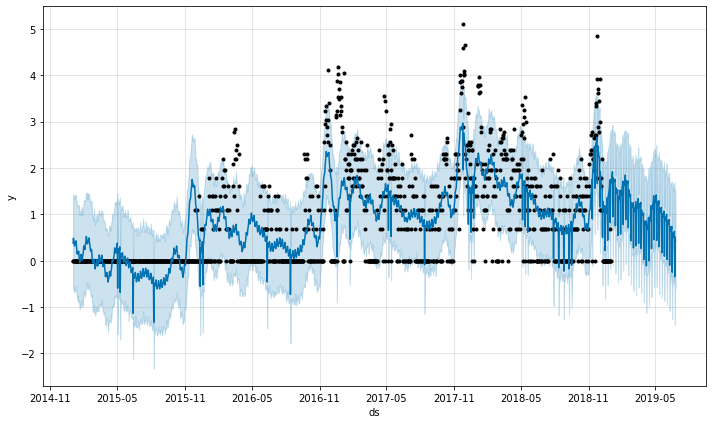

In [17]:
fig1 = m.plot(forecast)

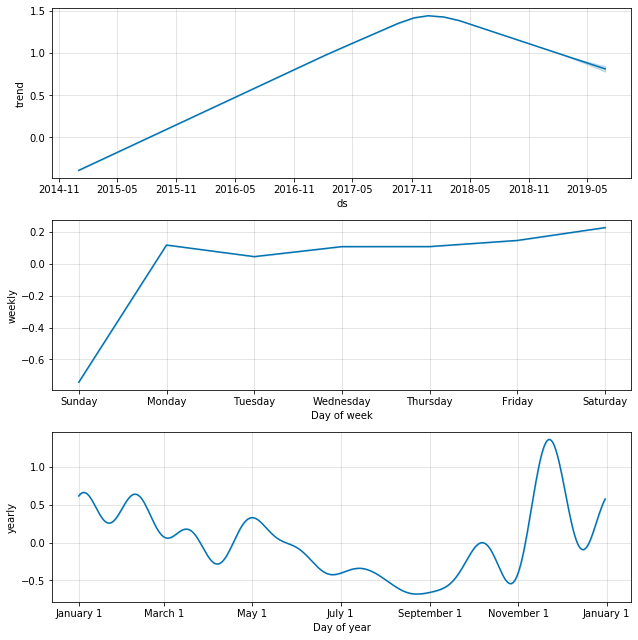

In [18]:
fig2 = m.plot_components(forecast)

In [19]:
# Python
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)


In [20]:
plot_components_plotly(m, forecast)

In [21]:
forecast

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2015-01-02 -0.391110   -0.633709    1.382678    -0.391110    -0.391110   
1    2015-01-03 -0.389325   -0.537624    1.431474    -0.389325    -0.389325   
2    2015-01-05 -0.385756   -0.677267    1.333403    -0.385756    -0.385756   
3    2015-01-06 -0.383971   -0.660973    1.376670    -0.383971    -0.383971   
4    2015-01-07 -0.382187   -0.639487    1.401382    -0.382187    -0.382187   
...         ...       ...         ...         ...          ...          ...   
1421 2019-06-21  0.816371   -0.494696    1.555084     0.784970     0.847097   
1422 2019-06-22  0.815106   -0.345923    1.692043     0.783502     0.846025   
1423 2019-06-23  0.813841   -1.380526    0.646170     0.782034     0.845279   
1424 2019-06-24  0.812576   -0.476458    1.562119     0.780577     0.844282   
1425 2019-06-25  0.811311   -0.589883    1.494715     0.779123     0.843225   

      additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0           0.775571              0.775571              0.775571  0.144880   
1           0.874956              0.874956              0.874956  0.225071   
2           0.780775              0.780775              0.780775  0.115978   
3           0.704423              0.704423              0.704423  0.043599   
4           0.755947              0.755947              0.755947  0.106180   
...              ...                   ...                   ...       ...   
1421       -0.253450             -0.253450             -0.253450  0.144880   
1422       -0.181942             -0.181942             -0.181942  0.225071   
1423       -1.155932             -1.155932             -1.155932 -0.742155   
1424       -0.302653             -0.302653             -0.302653  0.115978   
1425       -0.378022             -0.378022             -0.378022  0.043599   

      weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0         0.144880      0.144880  0.630691      0.630691      0.630691   
1         0.225071      0.225071  0.649885      0.649885      0.649885   
2         0.115978      0.115978  0.664797      0.664797      0.664797   
3         0.043599      0.043599  0.660824      0.660824      0.660824   
4         0.106180      0.106180  0.649767      0.649767      0.649767   
...            ...           ...       ...           ...           ...   
1421      0.144880      0.144880 -0.398330     -0.398330     -0.398330   
1422      0.225071      0.225071 -0.407013     -0.407013     -0.407013   
1423     -0.742155     -0.742155 -0.413777     -0.413777     -0.413777   
1424      0.115978      0.115978 -0.418631     -0.418631     -0.418631   
1425      0.043599      0.043599 -0.421621     -0.421621     -0.421621   

      multiplicative_terms  multiplicative_terms_lower  \
0                      0.0                         0.0   
1                      0.0                         0.0   
2                      0.0                         0.0   
3                      0.0                         0.0   
4                      0.0                         0.0   
...                    ...                         ...   
1421                   0.0                         0.0   
1422                   0.0                         0.0   
1423                   0.0                         0.0   
1424                   0.0                         0.0   
1425                   0.0                         0.0   

      multiplicative_terms_upper      yhat  
0                            0.0  0.384462  
1                            0.0  0.485631  
2                            0.0  0.395019  
3                            0.0  0.320452  
4                            0.0  0.373760  
...                          ...       ...  
1421                         0.0  0.562921  
1422                         0.0  0.633164  
1423                         0.0 -0.342090  
1424                         0.0  0.509924  
1425                         0.0  0.433290  



In [22]:
predicted = pd.DataFrame(np.exp(forecast["yhat"]).values, index = forecast.ds)

In [23]:
predicted = predicted.loc[predicted.index.year == 2019]
predicted

0
ds                  
2019-01-01  5.365919
2019-01-02  5.860642
2019-01-03  5.968253
2019-01-04  6.264978
2019-01-05  6.803665
...              ...
2019-06-21  1.755793
2019-06-22  1.883561
2019-06-23  0.710284
2019-06-24  1.665164
2019-06-25  1.542323

[176 rows x 1 columns]

In [24]:
dates = ventest.index

In [25]:
predicted = predicted.loc[dates]

In [26]:
from baseline_tools import plot_series

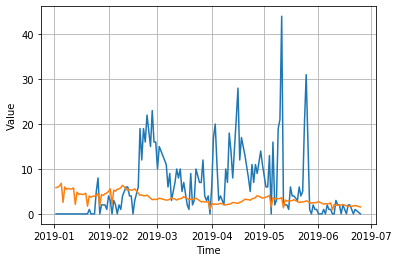

In [27]:
plot_series(predicted.index, ventest)
plot_series(predicted.index, predicted)

## Tirando os outliers

In [28]:
ventilador = store_13["VENTILADOR VF40 SILENCE FORCE CD RE"]
ventilador.index = pd.to_datetime(ventilador.index)
ventest = ventilador.loc[ventilador.index.year == 2019]
ventilador = ventilador.loc[ventilador.index.year != 2019]

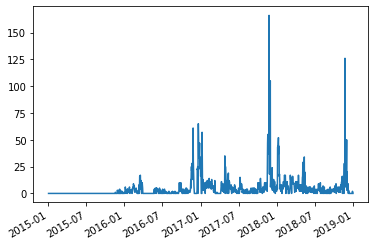

In [29]:
ventilador.plot();

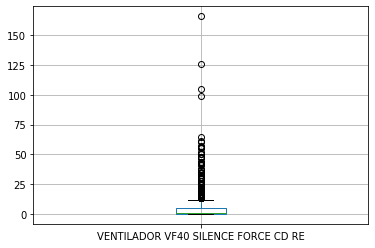

In [30]:
pd.DataFrame(ventilador).boxplot()

In [31]:
ventilador.loc[ventilador > 30] = None

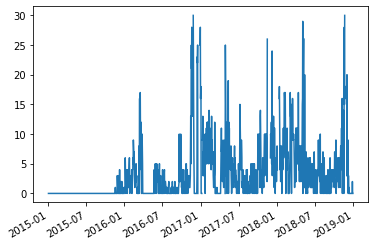

In [32]:
ventilador.plot()

In [33]:
ventilog = np.log(ventilador)

/home/itamar/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning:

divide by zero encountered in log



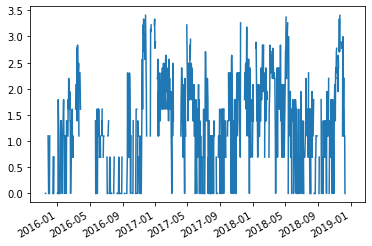

In [34]:
ventilog.plot();

In [35]:
ventilog = ventilog.reset_index()

In [36]:
ventilog.columns = ["ds","y"]
ventilog = ventilog.replace(-np.inf,0)

In [37]:
m = Prophet()
m.fit(ventilog)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [38]:
future = m.make_future_dataframe(periods=176) #same number of days that we have in 2019

In [39]:
future.tail()

ds
1421 2019-06-21
1422 2019-06-22
1423 2019-06-23
1424 2019-06-24
1425 2019-06-25

In [40]:
forecast = m.predict(future)

In [41]:
forecast[["ds", "yhat","yhat_lower", "yhat_upper"]].tail()

ds      yhat  yhat_lower  yhat_upper
1421 2019-06-21  0.809510   -0.061197    1.649711
1422 2019-06-22  0.876096   -0.036975    1.785347
1423 2019-06-23  0.049521   -0.774329    1.030689
1424 2019-06-24  0.755656   -0.222459    1.666934
1425 2019-06-25  0.692701   -0.227659    1.660021

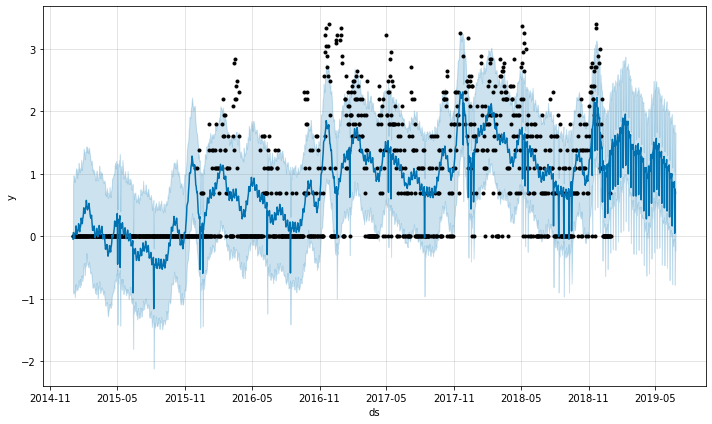

In [42]:
fig1 = m.plot(forecast)

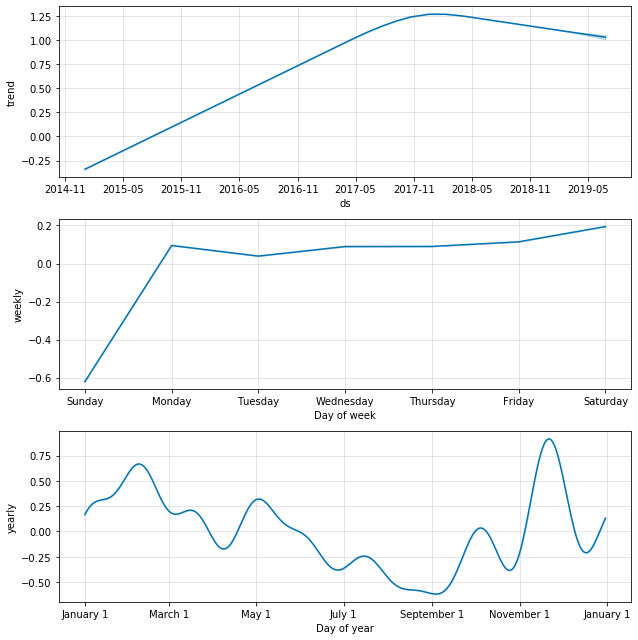

In [43]:
fig2 = m.plot_components(forecast)

In [44]:
forecast

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2015-01-02 -0.340374   -0.879793    0.819706    -0.340374    -0.340374   
1    2015-01-03 -0.338766   -0.913372    0.978046    -0.338766    -0.338766   
2    2015-01-05 -0.335551   -0.872917    0.938676    -0.335551    -0.335551   
3    2015-01-06 -0.333943   -0.897753    0.869435    -0.333943    -0.333943   
4    2015-01-07 -0.332336   -0.973277    0.915472    -0.332336    -0.332336   
...         ...       ...         ...         ...          ...          ...   
1421 2019-06-21  1.030390   -0.061197    1.649711     1.007852     1.052165   
1422 2019-06-22  1.029899   -0.036975    1.785347     1.007129     1.051845   
1423 2019-06-23  1.029407   -0.774329    1.030689     1.006390     1.051505   
1424 2019-06-24  1.028916   -0.222459    1.666934     1.005492     1.051167   
1425 2019-06-25  1.028425   -0.227659    1.660021     1.004808     1.050828   

      additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0           0.295167              0.295167              0.295167  0.113940   
1           0.399838              0.399838              0.399838  0.194168   
2           0.340885              0.340885              0.340885  0.094743   
3           0.301023              0.301023              0.301023  0.038931   
4           0.364542              0.364542              0.364542  0.089252   
...              ...                   ...                   ...       ...   
1421       -0.220880             -0.220880             -0.220880  0.113940   
1422       -0.153802             -0.153802             -0.153802  0.194168   
1423       -0.979886             -0.979886             -0.979886 -0.620809   
1424       -0.273260             -0.273260             -0.273260  0.094743   
1425       -0.335724             -0.335724             -0.335724  0.038931   

      weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0         0.113940      0.113940  0.181227      0.181227      0.181227   
1         0.194168      0.194168  0.205671      0.205671      0.205671   
2         0.094743      0.094743  0.246142      0.246142      0.246142   
3         0.038931      0.038931  0.262092      0.262092      0.262092   
4         0.089252      0.089252  0.275290      0.275290      0.275290   
...            ...           ...       ...           ...           ...   
1421      0.113940      0.113940 -0.334820     -0.334820     -0.334820   
1422      0.194168      0.194168 -0.347970     -0.347970     -0.347970   
1423     -0.620809     -0.620809 -0.359077     -0.359077     -0.359077   
1424      0.094743      0.094743 -0.368004     -0.368004     -0.368004   
1425      0.038931      0.038931 -0.374655     -0.374655     -0.374655   

      multiplicative_terms  multiplicative_terms_lower  \
0                      0.0                         0.0   
1                      0.0                         0.0   
2                      0.0                         0.0   
3                      0.0                         0.0   
4                      0.0                         0.0   
...                    ...                         ...   
1421                   0.0                         0.0   
1422                   0.0                         0.0   
1423                   0.0                         0.0   
1424                   0.0                         0.0   
1425                   0.0                         0.0   

      multiplicative_terms_upper      yhat  
0                            0.0 -0.045206  
1                            0.0  0.061072  
2                            0.0  0.005334  
3                            0.0 -0.032920  
4                            0.0  0.032207  
...                          ...       ...  
1421                         0.0  0.809510  
1422                         0.0  0.876096  
1423                         0.0  0.049521  
1424                         0.0  0.755656  
1425                         0.0  0.692701  



In [45]:
predicted = pd.DataFrame(np.exp(forecast["yhat"]).values, index = forecast.ds)

In [46]:
predicted = predicted.loc[predicted.index.year == 2019]
predicted

0
ds                  
2019-01-01  3.696981
2019-01-02  3.992358
2019-01-03  4.091276
2019-01-04  4.281046
2019-01-05  4.724388
...              ...
2019-06-21  2.246806
2019-06-22  2.401507
2019-06-23  1.050768
2019-06-24  2.129007
2019-06-25  1.999108

[176 rows x 1 columns]

In [47]:
dates = ventest.index

In [48]:
predicted = predicted.loc[dates]

In [49]:
from baseline_tools import plot_series

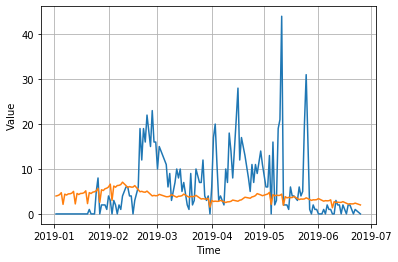

In [50]:
plot_series(predicted.index, ventest)
plot_series(predicted.index, predicted)

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [52]:
mean_absolute_error(ventest, predicted)

5.109159768958576

In [53]:
mean_squared_error(ventest, predicted)

58.029700177435565

## Ferro

In [54]:
store_13

ENTREGA  GE2 CELULAR  GE1 ELETROPORTATEIS  GE1 CELULAR  \
2015-01-02     22.0         11.0                 11.0         22.0   
2015-01-03     31.0         12.0                 24.0         26.0   
2015-01-05     41.0          8.0                 26.0         28.0   
2015-01-06     44.0         10.0                 22.0         23.0   
2015-01-07     55.0          9.0                 21.0         38.0   
...             ...          ...                  ...          ...   
2019-06-19      0.0          0.0                  0.0          0.0   
2019-06-20      0.0          0.0                  0.0          0.0   
2019-06-21      0.0          0.0                  0.0          0.0   
2019-06-22      0.0          0.0                  0.0          0.0   
2019-06-25      0.0          0.0                  0.0          0.0   

            CHIP VIVO 4G 128K P19 HRS PRE  GE1 TV LCD LED  \
2015-01-02                           17.0             4.0   
2015-01-03                           20.0             4.0   
2015-01-05                           19.0             4.0   
2015-01-06                           20.0             4.0   
2015-01-07                           22.0             5.0   
...                                   ...             ...   
2019-06-19                            1.0             0.0   
2019-06-20                            3.0             0.0   
2019-06-21                            3.0             0.0   
2019-06-22                            2.0             0.0   
2019-06-25                            2.0             0.0   

            CHIP CLARO ODA 128KB TRIPE  GE1 MOVEIS 1  GE2 REFRIGERADOR  \
2015-01-02                         0.0           2.0               3.0   
2015-01-03                         0.0           4.0               2.0   
2015-01-05                         0.0           8.0              20.0   
2015-01-06                         0.0           4.0               7.0   
2015-01-07                         0.0           7.0               8.0   
...                                ...           ...               ...   
2019-06-19                         4.0           0.0               0.0   
2019-06-20                         2.0           0.0               0.0   
2019-06-21                         3.0           0.0               0.0   
2019-06-22                         1.0           0.0               0.0   
2019-06-25                         3.0           0.0               0.0   

            CHIP TIM INFINITY PRE HRD TRIPLO 4G  ...  CHIP OI 4G HLR 39  \
2015-01-02                                  0.0  ...                0.0   
2015-01-03                                  0.0  ...                0.0   
2015-01-05                                  0.0  ...                0.0   
2015-01-06                                  0.0  ...                0.0   
2015-01-07                                  0.0  ...                0.0   
...                                         ...  ...                ...   
2019-06-19                                 11.0  ...               24.0   
2019-06-20                                  6.0  ...               23.0   
2019-06-21                                 11.0  ...               22.0   
2019-06-22                                  2.0  ...               18.0   
2019-06-25                                  5.0  ...               17.0   

            GE2 LAV. ROUPAS AUTOMATICA  \
2015-01-02                         0.0   
2015-01-03                         0.0   
2015-01-05                         2.0   
2015-01-06                         2.0   
2015-01-07                         2.0   
...                                ...   
2019-06-19                         0.0   
2019-06-20                         0.0   
2019-06-21                         0.0   
2019-06-22                         0.0   
2019-06-25                         0.0   

            SUPORTE TV UNIVERSAL LCD/LED 10 A 71 SBRUB750  \
2015-01-02                                            0.0   
2015-01-03           

In [55]:
ferro = store_13["FERRO SECO METALICO VFA 1110X BLACK E DECKER"]
ferro.index = pd.to_datetime(ferro.index)
ferrotest = ferro.loc[ferro.index.year == 2019]
ferro = ferro.loc[ferro.index.year != 2019]

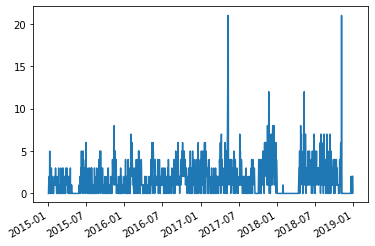

In [56]:
ferro.plot();

In [57]:
ferrolog = np.log(ferro)

/home/itamar/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning:

divide by zero encountered in log



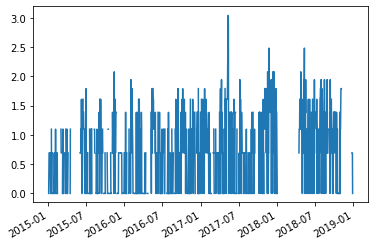

In [58]:
ferrolog.plot();

In [59]:
ferrolog = ferrolog.reset_index()

In [60]:
ferrolog.columns = ["ds","y"]
ferrolog = ferrolog.replace(-np.inf,0)

In [61]:
m = Prophet()
m.fit(ferrolog)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [62]:
future = m.make_future_dataframe(periods=176) #same number of days that we have in 2019

In [63]:
future.tail()

ds
1421 2019-06-21
1422 2019-06-22
1423 2019-06-23
1424 2019-06-24
1425 2019-06-25

In [64]:
forecast = m.predict(future)

In [65]:
forecast[["ds", "yhat","yhat_lower", "yhat_upper"]].tail()

ds      yhat  yhat_lower  yhat_upper
1421 2019-06-21  0.798463    0.104107    1.557048
1422 2019-06-22  0.768819    0.030074    1.544932
1423 2019-06-23  0.137225   -0.617889    0.852280
1424 2019-06-24  0.696832   -0.063957    1.455973
1425 2019-06-25  0.673189   -0.134187    1.435061

<IPython.core.display.Javascript object>


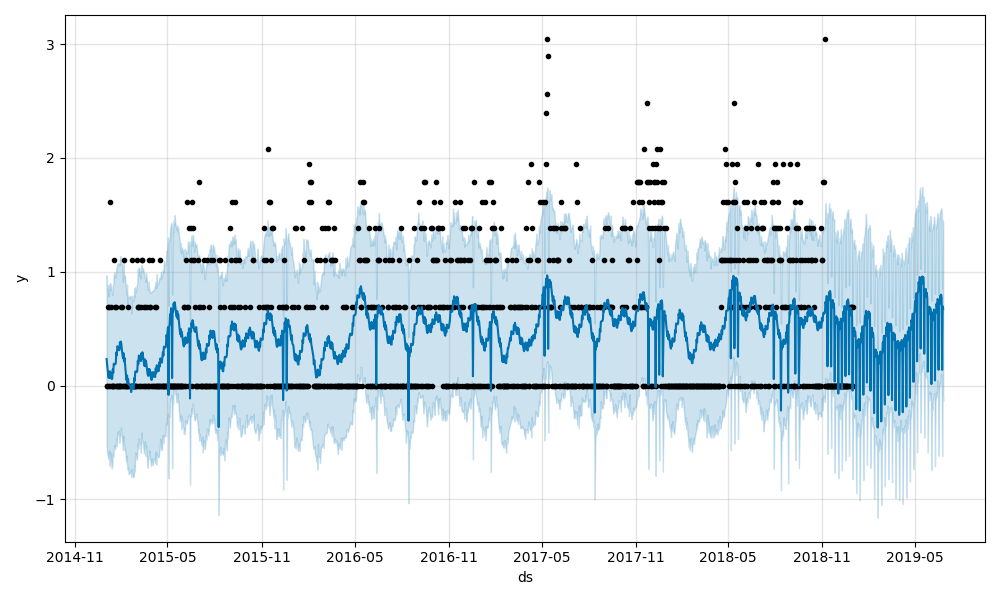

In [66]:
%matplotlib notebook
fig1 = m.plot(forecast)

<IPython.core.display.Javascript object>


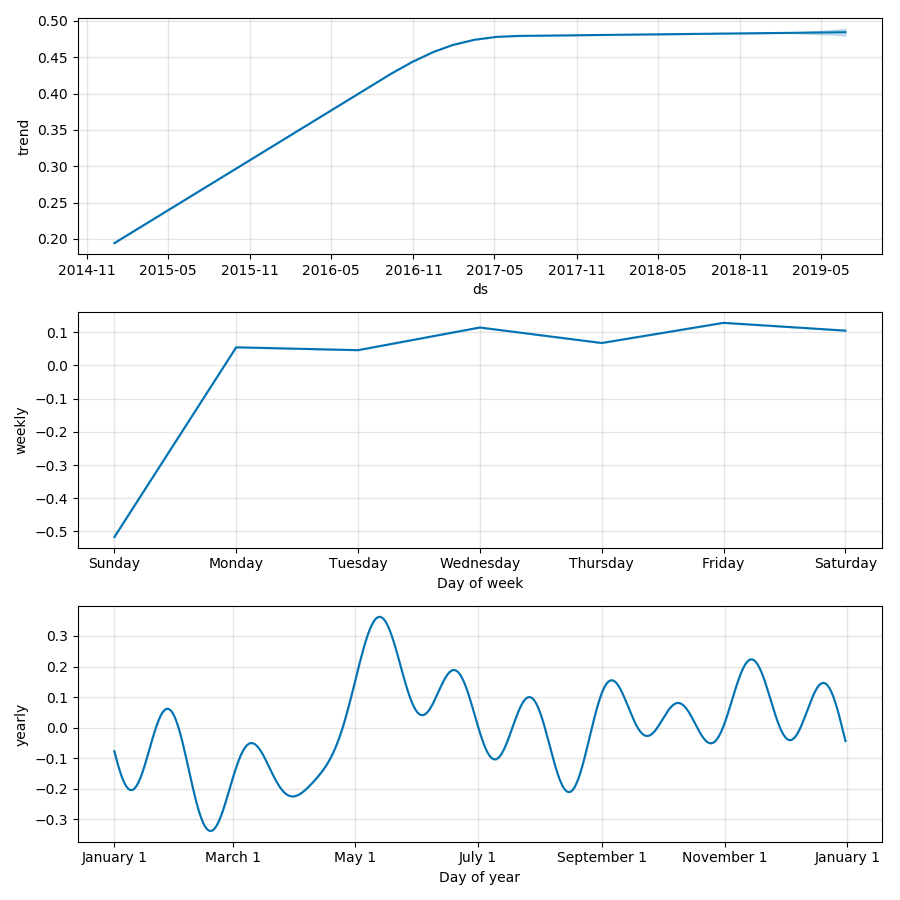

In [67]:
fig2 = m.plot_components(forecast)

In [68]:
forecast

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2015-01-02  0.194238   -0.522059    0.968617     0.194238     0.194238   
1    2015-01-03  0.194615   -0.579167    0.850161     0.194615     0.194615   
2    2015-01-05  0.195368   -0.639080    0.882357     0.195368     0.195368   
3    2015-01-06  0.195745   -0.644010    0.784265     0.195745     0.195745   
4    2015-01-07  0.196122   -0.570839    0.889449     0.196122     0.196122   
...         ...       ...         ...         ...          ...          ...   
1421 2019-06-21  0.484334    0.104107    1.557048     0.480149     0.488793   
1422 2019-06-22  0.484341    0.030074    1.544932     0.480112     0.488831   
1423 2019-06-23  0.484348   -0.617889    0.852280     0.480077     0.488899   
1424 2019-06-24  0.484354   -0.063957    1.455973     0.480034     0.488938   
1425 2019-06-25  0.484361   -0.134187    1.435061     0.480006     0.488975   

      additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0           0.038687              0.038687              0.038687  0.128600   
1          -0.009365             -0.009365             -0.009365  0.105143   
2          -0.102257             -0.102257             -0.102257  0.054809   
3          -0.127757             -0.127757             -0.127757  0.046241   
4          -0.072953             -0.072953             -0.072953  0.114514   
...              ...                   ...                   ...       ...   
1421        0.314129              0.314129              0.314129  0.128600   
1422        0.284478              0.284478              0.284478  0.105143   
1423       -0.347122             -0.347122             -0.347122 -0.517120   
1424        0.212478              0.212478              0.212478  0.054809   
1425        0.188827              0.188827              0.188827  0.046241   

      weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0         0.128600      0.128600 -0.089913     -0.089913     -0.089913   
1         0.105143      0.105143 -0.114508     -0.114508     -0.114508   
2         0.054809      0.054809 -0.157066     -0.157066     -0.157066   
3         0.046241      0.046241 -0.173998     -0.173998     -0.173998   
4         0.114514      0.114514 -0.187467     -0.187467     -0.187467   
...            ...           ...       ...           ...           ...   
1421      0.128600      0.128600  0.185529      0.185529      0.185529   
1422      0.105143      0.105143  0.179335      0.179335      0.179335   
1423     -0.517120     -0.517120  0.169998      0.169998      0.169998   
1424      0.054809      0.054809  0.157669      0.157669      0.157669   
1425      0.046241      0.046241  0.142587      0.142587      0.142587   

      multiplicative_terms  multiplicative_terms_lower  \
0                      0.0                         0.0   
1                      0.0                         0.0   
2                      0.0                         0.0   
3                      0.0                         0.0   
4                      0.0                         0.0   
...                    ...                         ...   
1421                   0.0                         0.0   
1422                   0.0                         0.0   
1423                   0.0                         0.0   
1424                   0.0                         0.0   
1425                   0.0                         0.0   

      multiplicative_terms_upper      yhat  
0                            0.0  0.232925  
1                            0.0  0.185250  
2                            0.0  0.093111  
3                            0.0  0.067988  
4                            0.0  0.123169  
...                          ...       ...  
1421                         0.0  0.798463  
1422                         0.0  0.768819  
1423                         0.0  0.137225  
1424                         0.0  0.696832  
1425                         0.0  0.673189  



In [69]:
predicted = pd.DataFrame(np.exp(forecast["yhat"]).values, index = forecast.ds)

In [70]:
lower = pd.DataFrame(np.exp(forecast["yhat_lower"]).values, index = forecast.ds)

In [71]:
upper =  pd.DataFrame(np.exp(forecast["yhat_upper"]).values, index = forecast.ds)

In [72]:
upper = upper.loc[upper.index.year == 2019]
lower = lower.loc[lower.index.year == 2019]

In [73]:
predicted = predicted.loc[predicted.index.year == 2019]
predicted

0
ds                  
2019-01-01  1.592840
2019-01-02  1.661591
2019-01-03  1.547262
2019-01-04  1.607552
2019-01-05  1.539214
...              ...
2019-06-21  2.222122
2019-06-22  2.157217
2019-06-23  1.147086
2019-06-24  2.007384
2019-06-25  1.960479

[176 rows x 1 columns]

In [78]:
dates = ferrotest.index

In [74]:
predicted = predicted.loc[dates]
upper = upper.loc[dates]
lower = lower.loc[dates]

In [75]:
from baseline_tools import plot_series

<IPython.core.display.Javascript object>


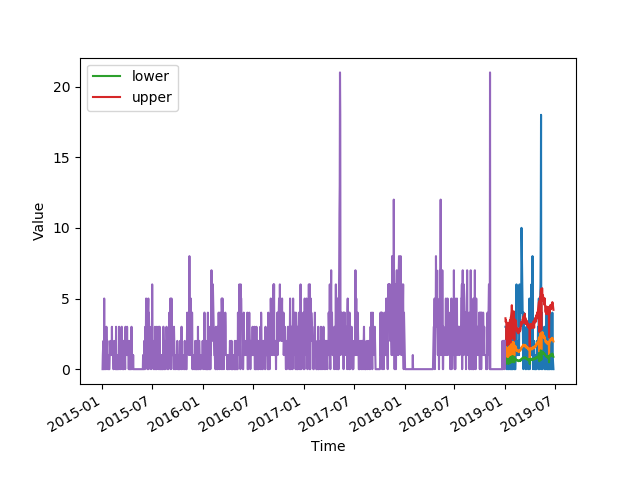

In [76]:
%matplotlib notebook
plot_series(predicted.index, ferrotest)
plot_series(predicted.index, predicted)
plot_series(predicted.index, lower, label="lower")
plot_series(predicted.index, upper, label="upper")

## Tirando os outliers

In [82]:
ferro = store_13["FERRO SECO METALICO VFA 1110X BLACK E DECKER"]
ferro.index = pd.to_datetime(ferro.index)
ferrotest = ferro.loc[ferro.index.year == 2019]
ferro = ferro.loc[ferro.index.year != 2019]

In [77]:
ferro.plot();

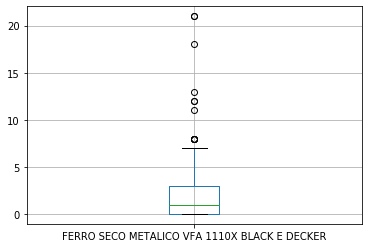

In [78]:
%matplotlib inline
pd.DataFrame(ferro).boxplot()
plt.show()

In [79]:
ferro.loc[ferro > 8] = None

In [80]:
ferrolog = np.log(ferro)

/home/itamar/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning:

divide by zero encountered in log



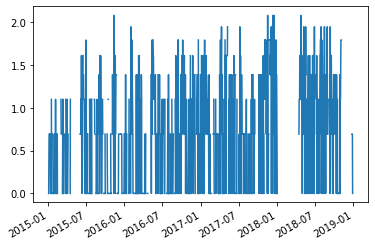

In [81]:
ferrolog.plot();

In [82]:
ferrolog = ferrolog.reset_index()

In [83]:
ferrolog.columns = ["ds","y"]
ferrolog = ferrolog.replace(-np.inf,0)

In [84]:
m = Prophet()
m.fit(ferrolog)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [85]:
future = m.make_future_dataframe(periods=176) #same number of days that we have in 2019

In [86]:
future.tail()

ds
1421 2019-06-21
1422 2019-06-22
1423 2019-06-23
1424 2019-06-24
1425 2019-06-25

In [87]:
forecast = m.predict(future)

In [88]:
forecast[["ds", "yhat","yhat_lower", "yhat_upper"]].tail()

ds      yhat  yhat_lower  yhat_upper
1421 2019-06-21  0.797888    0.057054    1.547900
1422 2019-06-22  0.759452    0.026548    1.463492
1423 2019-06-23  0.161393   -0.596258    0.854051
1424 2019-06-24  0.705511   -0.025617    1.401990
1425 2019-06-25  0.682763   -0.037665    1.367695

<IPython.core.display.Javascript object>


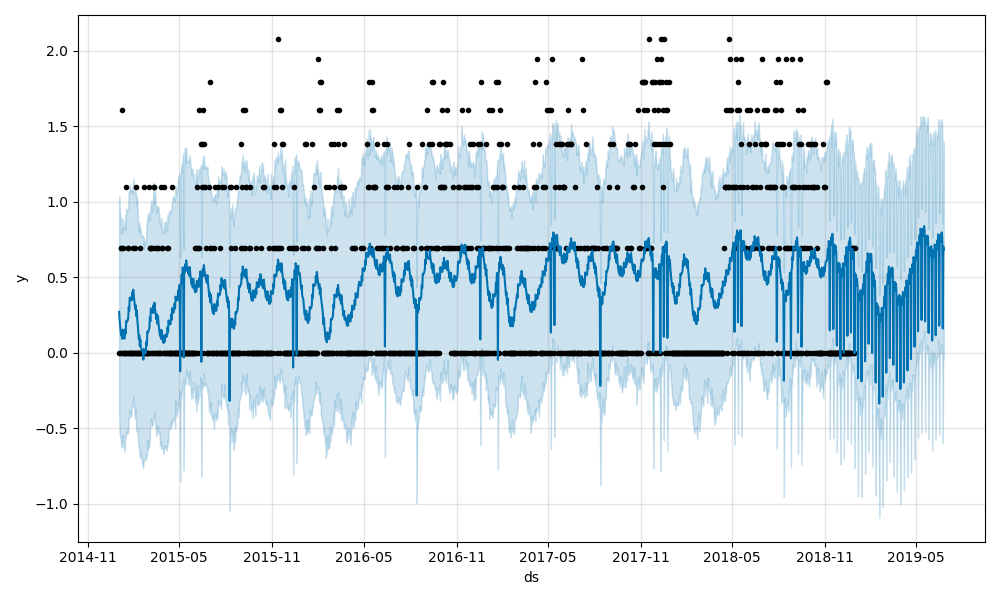

In [89]:
%matplotlib notebook
fig1 = m.plot(forecast)

<IPython.core.display.Javascript object>


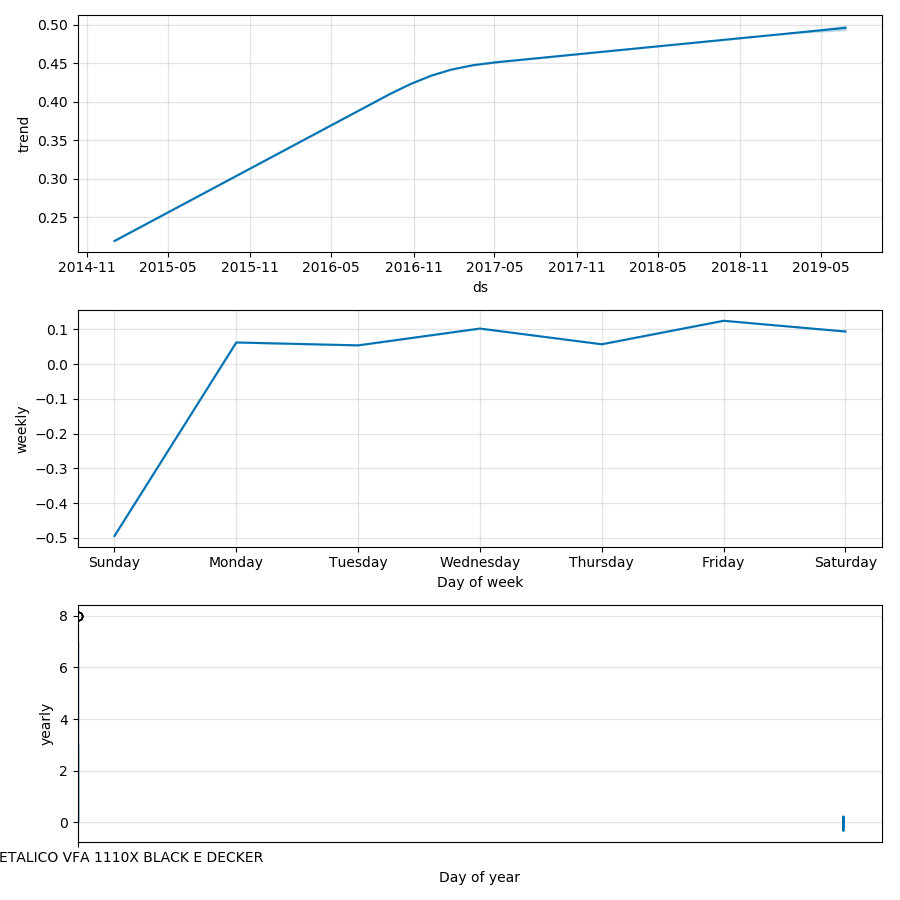

In [90]:
fig2 = m.plot_components(forecast)

In [91]:
forecast

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2015-01-02  0.219458   -0.404612    1.037519     0.219458     0.219458   
1    2015-01-03  0.219767   -0.535160    0.958191     0.219767     0.219767   
2    2015-01-05  0.220386   -0.565721    0.889057     0.220386     0.220386   
3    2015-01-06  0.220695   -0.625528    0.793101     0.220695     0.220695   
4    2015-01-07  0.221005   -0.590781    0.848504     0.221005     0.221005   
...         ...       ...         ...         ...          ...          ...   
1421 2019-06-21  0.495416    0.057054    1.547900     0.492715     0.498070   
1422 2019-06-22  0.495472    0.026548    1.463492     0.492749     0.498152   
1423 2019-06-23  0.495529   -0.596258    0.854051     0.492787     0.498230   
1424 2019-06-24  0.495586   -0.025617    1.401990     0.492836     0.498310   
1425 2019-06-25  0.495643   -0.037665    1.367695     0.492872     0.498387   

      additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0           0.051872              0.051872              0.051872  0.124676   
1          -0.003924             -0.003924             -0.003924  0.093822   
2          -0.079436             -0.079436             -0.079436  0.062284   
3          -0.105691             -0.105691             -0.105691  0.054001   
4          -0.072088             -0.072088             -0.072088  0.102302   
...              ...                   ...                   ...       ...   
1421        0.302472              0.302472              0.302472  0.124676   
1422        0.263980              0.263980              0.263980  0.093822   
1423       -0.334137             -0.334137             -0.334137 -0.494195   
1424        0.209925              0.209925              0.209925  0.062284   
1425        0.187120              0.187120              0.187120  0.054001   

      weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0         0.124676      0.124676 -0.072804     -0.072804     -0.072804   
1         0.093822      0.093822 -0.097746     -0.097746     -0.097746   
2         0.062284      0.062284 -0.141720     -0.141720     -0.141720   
3         0.054001      0.054001 -0.159692     -0.159692     -0.159692   
4         0.102302      0.102302 -0.174391     -0.174391     -0.174391   
...            ...           ...       ...           ...           ...   
1421      0.124676      0.124676  0.177796      0.177796      0.177796   
1422      0.093822      0.093822  0.170158      0.170158      0.170158   
1423     -0.494195     -0.494195  0.160058      0.160058      0.160058   
1424      0.062284      0.062284  0.147640      0.147640      0.147640   
1425      0.054001      0.054001  0.133119      0.133119      0.133119   

      multiplicative_terms  multiplicative_terms_lower  \
0                      0.0                         0.0   
1                      0.0                         0.0   
2                      0.0                         0.0   
3                      0.0                         0.0   
4                      0.0                         0.0   
...                    ...                         ...   
1421                   0.0                         0.0   
1422                   0.0                         0.0   
1423                   0.0                         0.0   
1424                   0.0                         0.0   
1425                   0.0                         0.0   

      multiplicative_terms_upper      yhat  
0                            0.0  0.271329  
1                            0.0  0.215843  
2                            0.0  0.140950  
3                            0.0  0.115004  
4                            0.0  0.148916  
...                          ...       ...  
1421                         0.0  0.797888  
1422                         0.0  0.759452  
1423                         0.0  0.161393  
1424                         0.0  0.705511  
1425                         0.0  0.682763  



In [93]:
predicted = pd.DataFrame(np.exp(forecast["yhat"]).values, index = forecast.ds)

In [94]:
lower = pd.DataFrame(np.exp(forecast["yhat_lower"]).values, index = forecast.ds)

In [95]:
upper =  pd.DataFrame(np.exp(forecast["yhat_upper"]).values, index = forecast.ds)

In [96]:
upper = upper.loc[upper.index.year == 2019]
lower = lower.loc[lower.index.year == 2019]

In [97]:
predicted = predicted.loc[predicted.index.year == 2019]
predicted

0
ds                  
2019-01-01  1.637217
2019-01-02  1.674028
2019-01-03  1.560731
2019-01-04  1.631696
2019-01-05  1.549616
...              ...
2019-06-21  2.220845
2019-06-22  2.137105
2019-06-23  1.175146
2019-06-24  2.024882
2019-06-25  1.979339

[176 rows x 1 columns]

In [98]:
dates = ferrotest.index

In [99]:
predicted = predicted.loc[dates]
upper = upper.loc[dates]
lower = lower.loc[dates]

In [100]:
from baseline_tools import plot_series

<IPython.core.display.Javascript object>


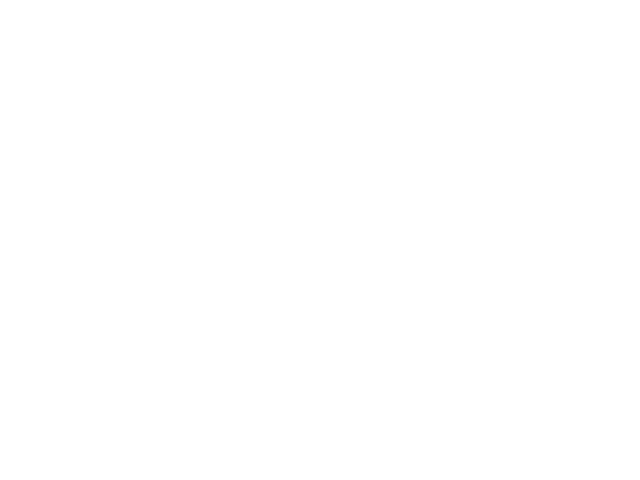

In [101]:
%matplotlib notebook
plot_series(predicted.index, ferrotest)
plot_series(predicted.index, predicted)
plot_series(predicted.index, lower, label="lower")
plot_series(predicted.index, upper, label="upper")

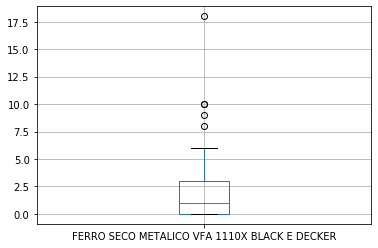

In [102]:
%matplotlib inline
pd.DataFrame(ferrotest).boxplot()

In [103]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [104]:
mean_absolute_error(ferrotest, predicted)

1.6122965179064936

In [105]:
mean_squared_error(ferrotest, predicted)

5.670875898158245

## Ferro sem outlier

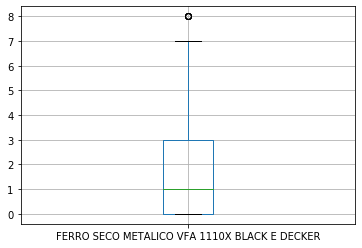

In [106]:
pd.DataFrame(ferro).boxplot()